<a href="https://colab.research.google.com/github/coryroyce/Handwritten_Letters_Prediction/blob/main/model_development/Letter_Classification_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Letter Classification

Updated: 3/1/2022
Author: coryroyce

Goals: 

*   Import and prep hand written letters
*   Visualize data
*   Apply vaious mehtods of classificaion and compare resulsts



# Load Packages

Install needed packages for this project

In [ ]:
# Install the emnist package for loading image data easily
!pip install emnist

# Clear output for this cell
from IPython.display import clear_output
clear_output()

Import packages used

In [ ]:
# Packages for data maniputlation 
import numpy as np
import pandas as pd

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Package for hand written letter dataset
import emnist

# Packages for Machine Learning Model development
import tensorflow as tf

# Packages for model analysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load Data

This project uses the EMNIST letter data set since it is less used in examples and tutorials normally just the numerical 0-9 digits data set.

In particular, there are a few different EMNSIT datasets to choos from and for simplicaity this project uses just the letters data set with balanced class examples containing 145,600 examples. Rather than the unbalanced dataset which would provide more training examples but would have class imbalance.

## Prep Data

Since we will be training a supervised classifier we need spearate our data into train and test splits.

In [ ]:
# Download the pre-split data set's rather than create out own with Sklean.
x_train, y_train = emnist.extract_training_samples('balanced')
x_test, y_test = emnist.extract_test_samples('balanced')

Keep only the capital leters for this use case

In [ ]:
# Define the indices only for capital letters
index_of_letters = [i for i in range(10,47)]
# index_of_capital_letters = [i for i in range(10,36)]

# Create a filtering mask
train_mask = np.isin(y_train, index_of_letters)
test_mask = np.isin(y_test, index_of_letters)

# Apply the filter to loaded data sets
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Reset to 0 based index for letters
y_train = y_train -10
y_test = y_test - 10

Define the capital letter dictionary

In [ ]:
labels_map = [
               # '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
               'a', 'b', 'd', 'e', 'f','g', 'h', 'n', 'q', 'r', 't',
              ]

labels_dict_map = {key: value for key, value in enumerate(labels_map)}

Convert the numerical labels into letters into sparse 1 hot encodings

In [ ]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 37)
y_test = tf.keras.utils.to_categorical(y_test, 37)

# Uncomment to map the interger mapping to the correct labels instead of sparse encodings
# y_train = np.vectorize(labels_dict.get)(y_train)
# y_test = np.vectorize(labels_dict.get)(y_test)


Normalize the data by dividing by 255 based on the RGB codes

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Display the size of the training and test sets

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in training set: ', x_train.shape[0])
print('Number of images in test set: ', x_test.shape[0])

x_train shape: (88800, 28, 28)
y_train shape: (88800, 37)
Number of images in training set:  88800
Number of images in test set:  14800


## Visualize Data

Create a function that takes in a specific input index and then plots the orginal image of the hand written diget along with the coresponding label.

In [ ]:
def plot_emnist_image_by_idx(idx, x, y):
  # Set the plot size
  plt.figure(figsize=(4,4))

  # Define the label mapping
  labels = [
               'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
               'a', 'b', 'd', 'e', 'f','g', 'h', 'n', 'q', 'r', 't',
              ]
  # Convert the integer lable into the assocoated letter  
  current_label = labels[y[idx].argmax()]
  
  # Add title
  plt.title(f'Label: {current_label}')
  
  # Remove axes lables and ticks
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)

  # Plot above grid image with cmap as gray and interpolation as none
  plt.imshow(x[idx], interpolation='none', cmap='gray')

  #display plot
  plt.show()

  return

Plot a few example images and labels from the data

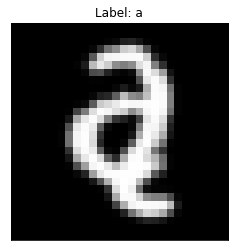

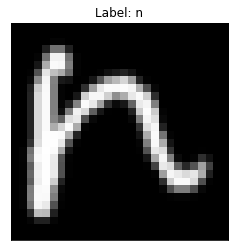

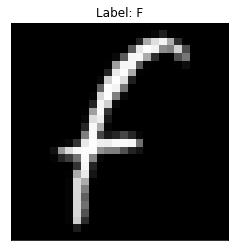

In [ ]:
for idx in range(1,4):
  plot_emnist_image_by_idx(idx = idx, x = x_train, y = y_train)

# Classification

Apply various classification methods for the data set.

## Create ML Model

Create the Layers model

In [ ]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

Version 1 model Architecture

In [ ]:
# Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(26,activation= 'softmax')) # 'softmax' 'sigmoid'

Try example of high performing model. Model architecture came from [Kaggle Article](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist)

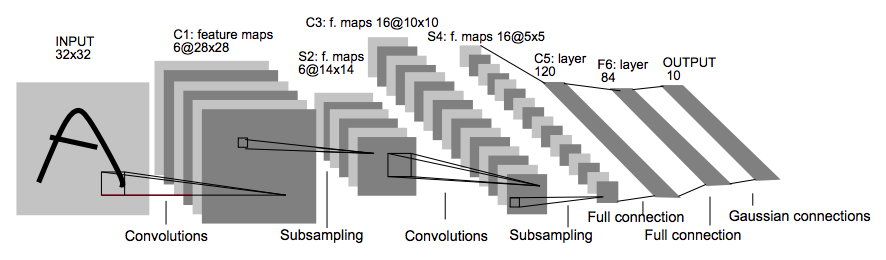

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(37, activation='softmax')) 


Display model architecture

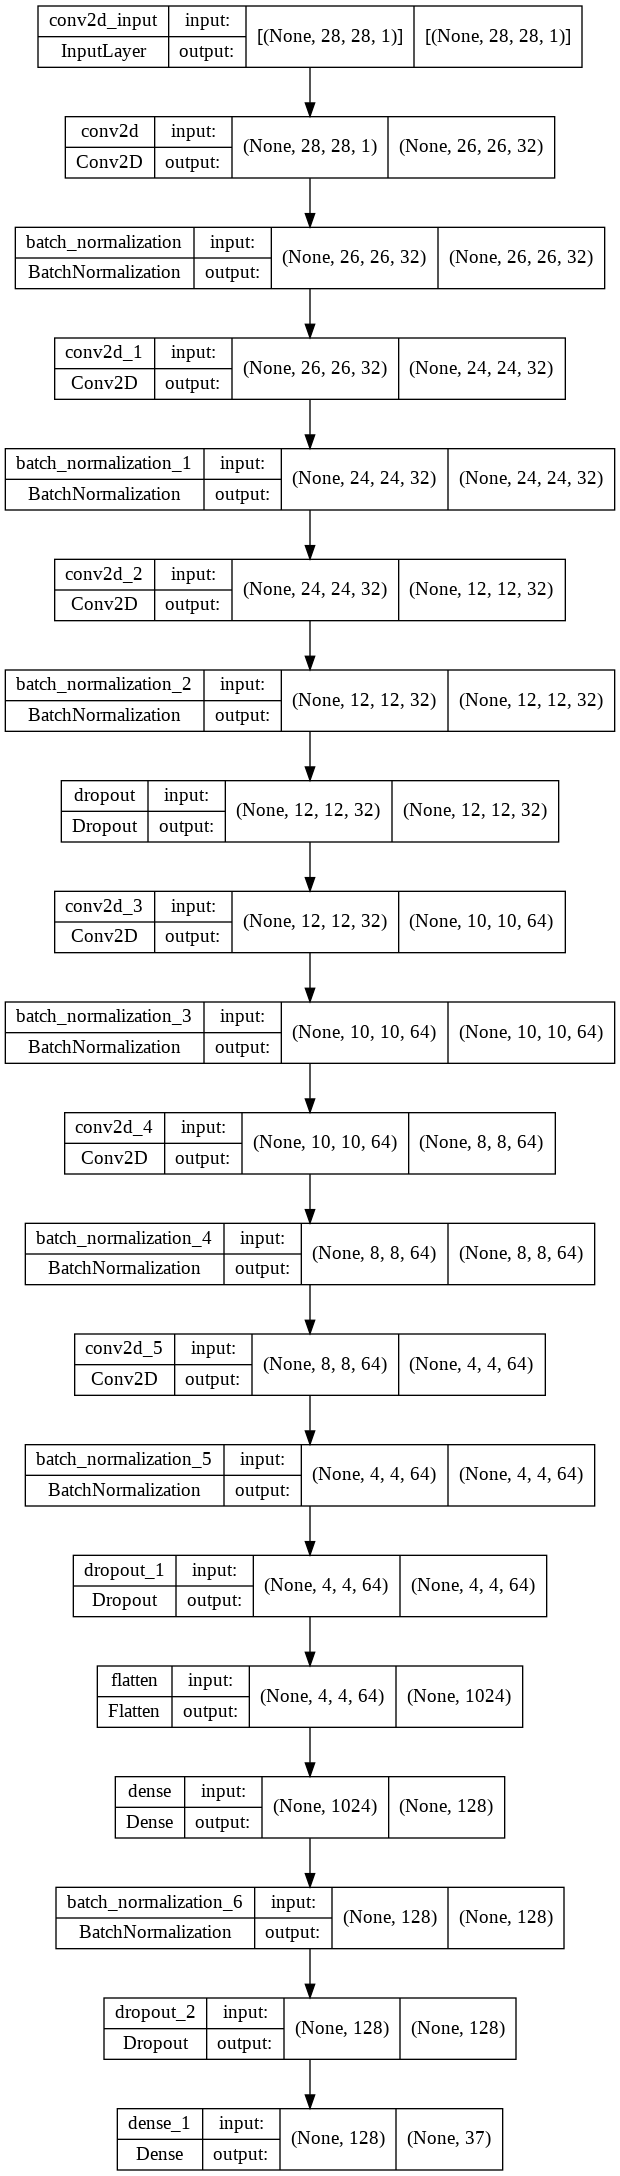

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)#, rankdir="LR")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       1

## Fit Model

Compile and Fit Model.

Note: In Colab the fiting is much faster on GPU mode (from about 4 minutes per epoch to about 30s). Did not figure out how to speed it up with a TPU, just turining it on in the settings still ran like the CPU version @ 4min per epoch.

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train,
                    y = y_train,
                    validation_data = (x_test, y_test),
                    epochs= 20)

Epoch 1/20
2775/2775 [==============================] - 58s 21ms/step - loss: 0.7471 - accuracy: 0.7805 - val_loss: 0.3587 - val_accuracy: 0.8869
Epoch 2/20
2775/2775 [==============================] - 57s 20ms/step - loss: 0.3799 - accuracy: 0.8776 - val_loss: 0.3256 - val_accuracy: 0.8996
Epoch 3/20
2775/2775 [==============================] - 54s 19ms/step - loss: 0.3272 - accuracy: 0.8942 - val_loss: 0.2708 - val_accuracy: 0.9114
Epoch 4/20
2775/2775 [==============================] - 54s 19ms/step - loss: 0.3004 - accuracy: 0.9012 - val_loss: 0.2659 - val_accuracy: 0.9136
Epoch 5/20
2775/2775 [==============================] - 54s 19ms/step - loss: 0.2787 - accuracy: 0.9065 - val_loss: 0.2546 - val_accuracy: 0.9171
Epoch 6/20
2775/2775 [==============================] - 54s 19ms/step - loss: 0.2636 - accuracy: 0.9110 - val_loss: 0.2403 - val_accuracy: 0.9216
Epoch 7/20
2775/2775 [==============================] - 56s 20ms/step - loss: 0.2530 - accuracy: 0.9142 - val_loss: 0.2372 -

## Review Metrics

Display the overal results

In [ ]:
# history.history

Plot Training History

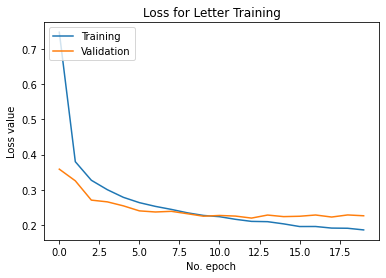

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Letter Training')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()

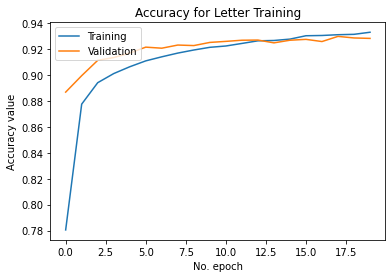

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy for Letter Training')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()

Plot metrics

In [ ]:
# Create predictions for the whole test set an convert them to lables (A,B,C...)
y_test_preds = model.predict(x_test)
y_test_preds = np.argmax(y_test_preds, axis=1)

# Convert to labels
y_test_as_labels = np.vectorize(labels_dict_map.get)(np.argmax(y_test, axis=1))
y_test_preds_as_labels = np.vectorize(labels_dict_map.get)(y_test_preds)

Create a confusion matrix:

In [ ]:
cm = confusion_matrix(y_test_as_labels, y_test_preds_as_labels)

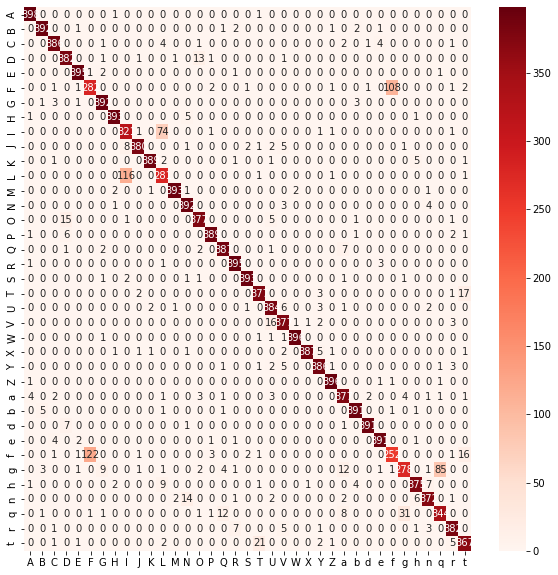

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f', xticklabels = labels_dict_map.values(), yticklabels= labels_dict_map.values()) 
plt.show()

In [ ]:
print(classification_report(y_test_as_labels, y_test_preds_as_labels))

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       400
           B       0.98      0.98      0.98       400
           C       0.96      0.96      0.96       400
           D       0.93      0.95      0.94       400
           E       0.98      0.99      0.98       400
           F       0.69      0.70      0.70       400
           G       0.96      0.98      0.97       400
           H       0.98      0.98      0.98       400
           I       0.72      0.80      0.76       400
           J       0.98      0.95      0.97       400
           K       0.99      0.97      0.98       400
           L       0.75      0.70      0.72       400
           M       0.99      0.98      0.99       400
           N       0.94      0.98      0.96       400
           O       0.94      0.94      0.94       400
           P       0.98      0.97      0.97       400
           Q       0.95      0.97      0.96       400
           R       0.97    

## Save and Load Model

Save the model

In [ ]:
# !rm -rf model_conv_v0

In [ ]:
# model_name = 'model_conv_v01'
# model.save(f'{model_name}.h5')

In [ ]:
# reloaded_model = tf.keras.models.load_model('model_conv_v01.h5'
# model = tf.keras.models.load_model('model_conv_v03.h5')

For Colab a couple of extra steps are need to download the zip file.

In [ ]:
# !zip -r /content/{model_name}.zip $model_name/
# from google.colab import files
# files.download(f'{model_name}.zip')

Load Model from ziped folder

In [ ]:
# !unzip /content/{model_name}.zip -d /content/{model_name}

In [ ]:
# reloaded_model = tf.keras.models.load_model('model_conv_v01')

In [ ]:
# reloaded_model.evaluate(x_test, y_test)

## Evaluate and Predict

Evaluate the Model

In [ ]:
model.evaluate(x_test, y_test)

463/463 [==============================] - 3s 7ms/step - loss: 0.2264 - accuracy: 0.9284


[0.22641055285930634, 0.9283784031867981]

Predict on individual images

Predicted Label: F
Actual Label: f


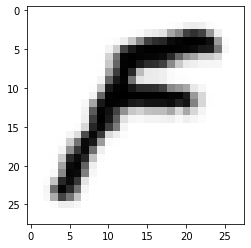

In [ ]:
image_index = 18
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
# pred = reloaded_model.predict(x_test[image_index].reshape(1, 28, 28, 1))
# print(pred[0])
pred = pred.argmax()
pred = labels_dict_map[pred]
print(f'Predicted Label: {pred}')
actual_label = labels_dict_map[y_test[image_index].argmax()]
print(f'Actual Label: {actual_label}')

Show results of multiple prediction

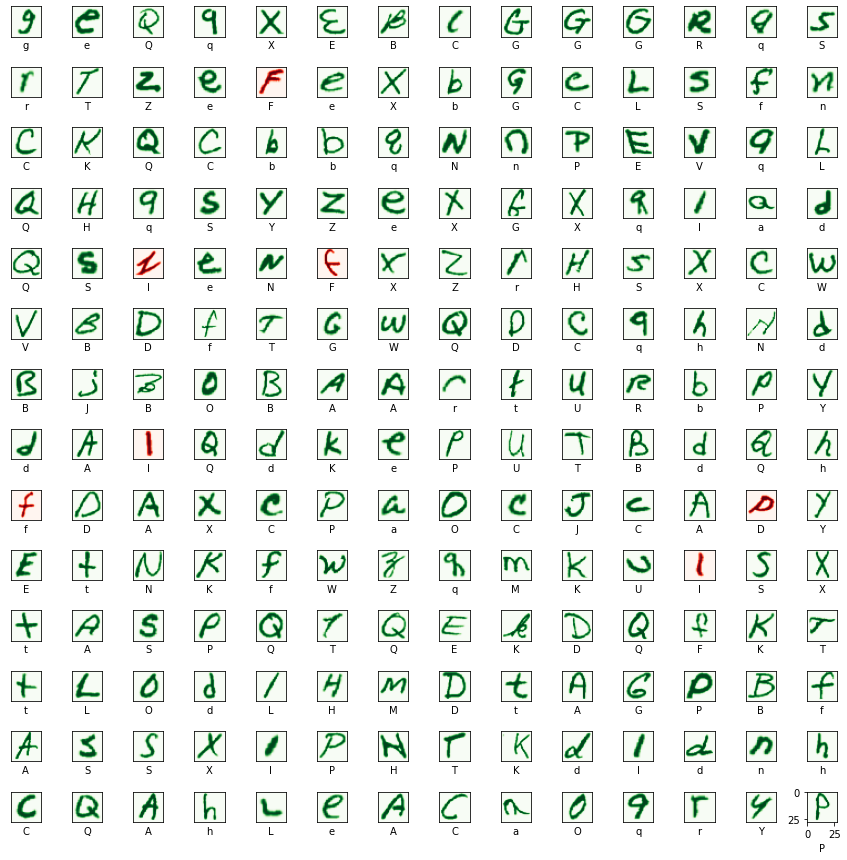

In [ ]:
import math
letters_to_display = 196
num_cells = math.ceil(math.sqrt(letters_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(letters_to_display):    
    predicted_label = y_test_preds_as_labels[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test_as_labels[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Explore creating probability plots from the predictions

In [ ]:
def create_probability_df(model_prediction):
    df_temp = pd.DataFrame(model_prediction, columns=labels_dict_map.values())
    df_temp = df_temp.transpose().reset_index()
    df_temp.columns = ['Label','Probability']

    return df_temp

In [ ]:
import plotly.express as px

df_temp_for_plot = create_probability_df(model.predict(x_test[0].reshape(1, 28, 28, 1)))
fig = px.bar(df_temp_for_plot, x='Label', y='Probability')
fig.show()

# Nest Steps



*   Apply auto ML to see scores
*   Build front end system to take in custom digits and predict on



# Reference

**Data Set References**

EMNIST dataset: https://www.nist.gov/itl/iad/image-group/emnist-dataset

Direct download: http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip

Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373

Importing and formating Image data inspired by [ArangurenAndres/EMNSIT-Image-classification](https://github.com/ArangurenAndres/EMNSIT-Image-classification/blob/master/cognition_project.ipynb)

Mapping and oringal file reference [Website](https://www.kaggle.com/crawford/emnist/version/1?select=emnist-balanced-mapping.txt)

**Classification Reference**

Image Classification in 10 Minutes with MNIST Dataset [Article](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)

How to Develop a CNN for MNIST [Article](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)